
# Part I: Pricing Analysis - Optimal pricing for `weekend vs. weekday` 
- Dataset: demand_data

- Additional info:
  - Linear Price-response Curve: d(p) = 𝛽 + 𝛽*p + 𝛽*𝑤
  - Assume unit cost of eggs is $3: c = 3 
  - Margin: (p-c) = (p-3)

In [181]:
import pandas as pd
import numpy as np

In [182]:
# import data
df_demand = pd.read_csv("/content/drive/MyDrive/BA_875/Datasets/demand_data.csv")
df_demand

,price,demand,weekend
0,4.0,7,1
1,3.5,7,0
2,5.0,5,0
3,6.0,4,0
4,6.5,4,0
5,7.0,4,0
6,2.0,8,1
7,4.0,6,0
8,5.5,5,0
9,3.0,7,0


## Linear Regression (Linear Price-response Curve)

In [183]:
import statsmodels.formula.api as smf
weekend_fit = smf.ols(formula='demand ~ price + weekend', data=df_demand).fit()
weekend_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     107.1
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           4.07e-14
Time:                        23:12:20   Log-Likelihood:                -27.363
No. Observations:                  32   AIC:                             60.73
Df Residuals:                      29   BIC:                             65.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9293      0.312     31.808      0.000       9.291      10.568
price         -0.8772      0.063    -14.033      0.000      -1.005      -0.749
weekend        0.4198      0.238      1.762      0.089      -0.068       0.907
==============================================================================
Omnibus:                        4.720   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.505
Skew:                           0.797   Prob(JB):                        0.173
Kurtosis:                       3.297   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
# Coefficients and intercept from the model
weekend_fit.params

Intercept    9.929305
price       -0.877246
weekend      0.419832
dtype: float64

## Calculate the optimal weekday price p* (when w = 0) and its corresponding profit

In [185]:
# add -1 to the minimizer if you want to maximize
pi = lambda x: -(weekend_fit.params[0] + weekend_fit.params[1]*x + weekend_fit.params[2]*0) * (x-3)

# D(p)(p-c)
# (-)fun is the maximum profit
# x is the optimal price
from scipy.optimize import minimize_scalar
optimal_price  = minimize_scalar(pi, method='brent')

In [186]:
# optimal price
optimal_price.x

7.15936076910103

In [187]:
print('The optimal weekday price is {}'.format(round(optimal_price.x,2)))

The optimal weekday price is 7.16


In [188]:
# optimal profit
optimal_price.fun

-15.176606574195322

In [189]:
print('The optimal weekday profit is {}'.format(round(-optimal_price.fun,2)))

The optimal weekday profit is 15.18


In [190]:
# is the price* within the credible range?
df_demand.price.min()
df_demand.price.max()

7.5

In [191]:
if round(optimal_price.x) >= df_demand.price.min() and round(optimal_price.x) <= df_demand.price.max():
  print('The optimal weeday price {} is witin the range {} and {}'.format(round(optimal_price.x,2), df_demand.price.min(),df_demand.price.max()))

The optimal weeday price 7.16 is witin the range 1.5 and 7.5


## Calculate the optimal weekend price p* (when w = 1) and its corresponding profit

In [192]:
# add -1 to the minimizer if you want to maximize
pi = lambda x: -(weekend_fit.params[0] + weekend_fit.params[1]*x + weekend_fit.params[2]*1) * (x-3)

# D(p)(p-c)
# (-)fun is the maximum profit
# x is the optimal price
from scipy.optimize import minimize_scalar
optimal_price  = minimize_scalar(pi, method='brent')

In [193]:
# optimal price
optimal_price.x

7.3986506999494095

In [194]:
print('The optimal weekday price is {}'.format(round(optimal_price.x,2)))

The optimal weekday price is 7.4


In [195]:
# optimal profit
optimal_price.fun

-16.97307166289135

In [196]:
print('The optimal weekday profit is {}'.format(round(-optimal_price.fun,2)))

The optimal weekday profit is 16.97


In [197]:
# is the price* within the credible range?
df_demand.price.min()
df_demand.price.max()

7.5

In [198]:
if round(optimal_price.x) >= df_demand.price.min() and round(optimal_price.x) <= df_demand.price.max():
  print('The optimal weeday price {} is witin the range {} and {}'.format(round(optimal_price.x,2), df_demand.price.min(),df_demand.price.max()))

The optimal weeday price 7.4 is witin the range 1.5 and 7.5


# Part II: Pricing Analysis - New vs Refurbished Product 
- Dataset: refurb_data
- The objective is to set optimal refurbished prices for all ranges of new prices and the corresponding profit for each case.

- Additional info:
  - Linear Price-response Curve: d(p) = 𝛽 + 𝛽 * 𝑟𝑒𝑓𝑢𝑟𝑏_𝑝𝑟𝑖𝑐𝑒 + 𝛽 * 𝑛𝑒𝑤_𝑝𝑟𝑖𝑐𝑒

  - New prices = [300,350,400]
  - Assume unit cost of refurbished product is $150 : c = 150 
  - Margin: (p-c) = (refurb_price -150)


In [199]:
# load data
df_refurb = pd.read_csv('/content/drive/MyDrive/BA_875/Datasets/refurb_data.csv')
df_refurb['dates'] = pd.to_datetime(df_refurb['dates'])
df_refurb['new_price'] = df_refurb['new_price'].astype("float")
df_refurb['refurb_price'] = df_refurb['refurb_price'].astype("float")
df_refurb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dates         500 non-null    datetime64[ns]
 1   new_price     500 non-null    float64       
 2   refurb_price  500 non-null    float64       
 3   choice        500 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 15.8+ KB


In [200]:
df_refurb

,dates,new_price,refurb_price,choice
0,2014-06-01,400.0,264.0,refurb
1,2014-06-01,400.0,264.0,refurb
2,2014-06-01,400.0,264.0,refurb
3,2014-06-01,400.0,264.0,new
4,2014-06-01,400.0,264.0,new
...,...,...,...,...
495,2014-06-30,300.0,222.0,new
496,2014-06-30,300.0,222.0,new
497,2014-06-30,300.0,222.0,new
498,2014-06-30,300.0,222.0,new


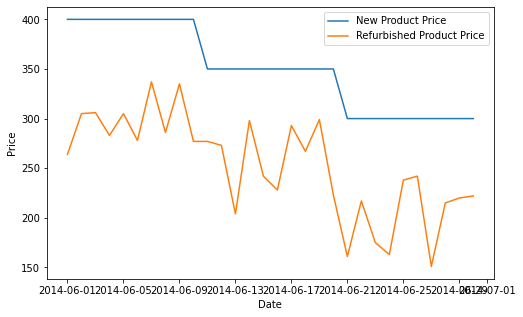

In [201]:
# price plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(df_refurb.iloc[:,:-1].drop_duplicates().dates,
         df_refurb.iloc[:,:-1].drop_duplicates().new_price, label='New Product Price')
plt.plot(df_refurb.iloc[:,:-1].drop_duplicates().dates,
         df_refurb.iloc[:,:-1].drop_duplicates().refurb_price, label='Refurbished Product Price')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [202]:
df_refurb[df_refurb.choice == 'refurb'].groupby(['dates']).size().to_frame('refurb_sales')

,refurb_sales
dates,
2014-06-01,9
2014-06-02,3
2014-06-03,6
2014-06-04,7
2014-06-05,8
2014-06-06,7
2014-06-07,3
2014-06-08,8
2014-06-09,5


In [203]:
df_refurb[df_refurb.choice == 'new'].groupby(['dates']).size().to_frame('refurb_sales')

,refurb_sales
dates,
2014-06-01,4
2014-06-02,5
2014-06-03,10
2014-06-04,7
2014-06-05,6
2014-06-06,10
2014-06-07,18
2014-06-08,9
2014-06-09,17


In [204]:
# Aggregate the df_refurb dataset by 'date' and count the number of refurb choice
refurb = pd.concat([df_refurb[df_refurb.choice == 'refurb'].groupby(['dates']).agg('mean'),
           
df_refurb[df_refurb.choice == 'refurb'].groupby(['dates']).size().to_frame('refurb_sales')], axis = 1)

In [205]:
refurb

,new_price,refurb_price,refurb_sales
dates,,,
2014-06-01,400.0,264.0,9
2014-06-02,400.0,305.0,3
2014-06-03,400.0,306.0,6
2014-06-04,400.0,283.0,7
2014-06-05,400.0,305.0,8
2014-06-06,400.0,278.0,7
2014-06-07,400.0,337.0,3
2014-06-08,400.0,286.0,8
2014-06-09,400.0,335.0,5


## Linear Regression Curve (Linear Price-response Curve)

In [206]:
import statsmodels.formula.api as smf
refurb_fit = smf.ols(formula='refurb_sales ~ new_price + refurb_price', data = refurb).fit()
refurb_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           refurb_sales   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     7.601
Date:                Sat, 30 Apr 2022   Prob (F-statistic):            0.00241
Time:                        23:12:20   Log-Likelihood:                -60.852
No. Observations:                  30   AIC:                             127.7
Df Residuals:                      27   BIC:                             131.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7019      3.224     -0.218      0.829      -7.316       5.912
new_price        0.0506      0.014      3.527      0.002       0.021       0.080
refurb_price    -0.0448      0.012     -3.815      0.001      -0.069      -0.021
==============================================================================
Omnibus:                        1.240   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.026
Skew:                          -0.433   Prob(JB):                        0.599
Kurtosis:                       2.733   Cond. No.                     3.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
ref_optimal = pd.DataFrame({'new price' : [300, 350, 400], 'solve': [False] *3, 'ref_p_opt': np.full(3, np.nan), 'ref_profit_opt': np.full(3, np.nan)})
ref_optimal

,new price,solve,ref_p_opt,ref_profit_opt
0,300,False,NaN,NaN
1,350,False,NaN,NaN
2,400,False,NaN,NaN


In [208]:
for i in range(3):
    refurb_pi = lambda x: -(refurb_fit.params[0] + refurb_fit.params[1]*ref_optimal.loc[i, 'new price'] + refurb_fit.params[2]*x ) * (x-150)
    refurb_optimal = minimize_scalar(refurb_pi, method='brent')
    ref_optimal.loc[i, 'solve'] = refurb_optimal.success
    ref_optimal.loc[i, 'ref_p_opt'] = refurb_optimal.x
    ref_optimal.loc[i, 'ref_profit_opt'] = -refurb_optimal.fun
    print('The optimal refurbished price is {} and profit is {} when the new price = {}'.format(round(refurb_optimal.x,2), round(-refurb_optimal.fun,2), ref_optimal.loc[i, 'new price'] ))

The optimal refurbished price is 236.39 and profit is 334.63 when the new price = 300
The optimal refurbished price is 264.6 and profit is 588.77 when the new price = 350
The optimal refurbished price is 292.8 and profit is 914.24 when the new price = 400


In [209]:
ref_optimal

,new price,solve,ref_p_opt,ref_profit_opt
0,300,True,236.392031,334.626614
1,350,True,264.595269,588.771095
2,400,True,292.798506,914.240451


## Summary

- The optimal refurbished price is 236.39 and profit is 334.63 when the new price = 300

- The optimal refurbished price is 264.6 and profit is 588.77 when the new price = 350

- The optimal refurbished price is 292.8 and profit is 914.24 when the new price = 400

# Part III: Pricing Analysis - Two-Segment Pricing 
- Dataset: [none needed]

- Additional info:
  - Linear Price-response Curve: d(p) = 10000-800p
  - Cost = $5
  - Also assume you will be able to price differently for customers with WTP above and below ```$7```

- 10,000 consumers are equally spread between 0 and 12.5.

- How many with:
  -WTP < 7 and WTP > 7?
  - Low WTP segment size
= (7/12.5)*10000 = 5600

  - High WTP segment size
= (12.5-7)/12.5 *10000 = 4400


##  First, find the optimal price* when only offering one price→i.e., with no segmentation

In [210]:
# No segmentation, unsegmented single price
# price* = 8.75
# profit* = 11250
# Max[D(p) * (p - c)] = (10000 - 800 * p) * (p - 5) 
pi = lambda x : -(10000 - 800 * x) * (x - 5) 
optimal_wtp = minimize_scalar(pi, method = 'brent')
optimal_wtp

     fun: -11249.999999999998
    nfev: 10
     nit: 4
 success: True
       x: 8.750000000000005

In [211]:
print('The optimal price is {} and profit is {}'.format(round(optimal_wtp.x,2), round(-optimal_wtp.fun,2)))

The optimal price is 8.75 and profit is 11250.0


## Report the optimal prices p* for segment 1 and segment 2

In [212]:
# Low WTP segment
# price_low* = 6
# profit_low* = 800
# Max[D(p) * (p - c)] = (5600 - 800 * p) * (p - 5) when p < 7 and 0 when p > 7
pi = lambda x : -(5600 - 800 * x) * (x - 5) if x < 7 else 0
opt_low_wtp = minimize_scalar(pi, method = 'brent')
opt_low_wtp

     fun: -799.9999999999998
    nfev: 12
     nit: 6
 success: True
       x: 6.000000000000001

In [213]:
print('The optimal price for low WTP segement is {} and profit for low WTP segement is {}'.format(round(opt_low_wtp.x,2), round(-opt_low_wtp.fun,2)))

The optimal price for low WTP segement is 6.0 and profit for low WTP segement is 800.0


In [214]:
# High WTP segment
# price_high* = 8.75
# profit_high* = 11250
# Max[D(p) * (p - c)] = (10000 - 800 * p) * (p - 5) when p > 7 and 4400 * (p -5) when p < 7
pi = lambda x : -(10000 - 800 * x) * (x - 5) if x > 7 else -4400 * (x-5)
opt_high_wtp = minimize_scalar(pi, method = 'brent')
opt_high_wtp

     fun: -11250.0
    nfev: 14
     nit: 8
 success: True
       x: 8.74999999999987

In [215]:
print('The optimal price for High WTP segement is {} and profit High WTP segement is {}'.format(round(opt_high_wtp.x,2), round(-opt_high_wtp.fun,2)))

The optimal price for High WTP segement is 8.75 and profit High WTP segement is 11250.0


## Report the difference in profit between the no segmentation case vs. the combined segment 1 and segment 2 cases and offer your conclusion

- The difference in profit between the no segmentation case vs. the combined segment 1 and segment 2 cases is 800.
- Thus, if we charge high WTP customers at ```$8.75``` and low WTP customers at ```$6.00```. The profit will have an increase in total of ```$800 or 7.0%.```

In [216]:
print('The difference in profit between the no segmentation case vs. the combined segment 1 and segment 2 cases is {}'.format(round((-opt_low_wtp.fun + -opt_high_wtp.fun) - -optimal_wtp.fun),2))

The difference in profit between the no segmentation case vs. the combined segment 1 and segment 2 cases is 800


In [217]:
seg_optimal = pd.DataFrame(columns = np.array(['Unsegmented', 'Segmented 1', 'Segmented 2' , 'Total']))
seg_optimal

,Unsegmented,Segmented 1,Segmented 2,Total


In [218]:
seg_optimal.loc['Avg Price', :] = [optimal_wtp.x, opt_low_wtp.x ,opt_high_wtp.x, (opt_low_wtp.x + opt_high_wtp.x) / 2]
seg_optimal

,Unsegmented,Segmented 1,Segmented 2,Total
Avg Price,8.75,6.0,8.75,7.375


In [219]:
seg_optimal.loc['Demand'] = [(10000 - 800 * optimal_wtp.x),  (5600 - 800 * opt_low_wtp.x) , (10000 - 800 * opt_high_wtp.x),  ((5600 - 800 * opt_low_wtp.x) + (10000 - 800 * opt_high_wtp.x))]
seg_optimal

,Unsegmented,Segmented 1,Segmented 2,Total
Avg Price,8.75,6.0,8.75,7.375
Demand,3000.0,800.0,3000.0,3800.0


In [220]:
seg_optimal.loc['Revenue'] = [(10000 - 800 * optimal_wtp.x) * optimal_wtp.x,  (5600 - 800 * opt_low_wtp.x) * opt_low_wtp.x , (10000 - 800 * opt_high_wtp.x) * opt_high_wtp.x,  ((5600 - 800 * opt_low_wtp.x) * opt_low_wtp.x + (10000 - 800 * opt_high_wtp.x) * opt_high_wtp.x)]
seg_optimal

,Unsegmented,Segmented 1,Segmented 2,Total
Avg Price,8.75,6.0,8.75,7.375
Demand,3000.0,800.0,3000.0,3800.0
Revenue,26250.0,4800.0,26250.0,31050.0


In [221]:
seg_optimal.loc['Contribution'] = [-optimal_wtp.fun, -opt_low_wtp.fun, -opt_high_wtp.fun , (-opt_low_wtp.fun + -opt_high_wtp.fun) ]
seg_optimal

,Unsegmented,Segmented 1,Segmented 2,Total
Avg Price,8.75,6.0,8.75,7.375
Demand,3000.0,800.0,3000.0,3800.0
Revenue,26250.0,4800.0,26250.0,31050.0
Contribution,11250.0,800.0,11250.0,12050.0
